# 巴哈姆特 - 資料分類器處理

# 讀檔案

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('reviews_sentiment_category_11categories_簡體.csv',sep='|')

In [ ]:
data.head(5)

,category,sentiment,review
0,外卖,1,很快，好吃，味道足，量大
1,外卖,1,没有送水没有送水没有送水
2,外卖,1,非常快，态度好。
3,外卖,1,方便，快捷，味道可口，快递给力
4,外卖,1,菜味道很棒！送餐很及时！


In [ ]:
data.shape

(82527, 3)

# 各類別統計

In [ ]:
data.groupby('category').size()

category
书籍      3851
外卖     11987
平板     10000
手机      2323
水果     10000
洗发水    10000
热水器      575
蒙牛      2033
衣服     10000
计算机     3992
酒店     17766
dtype: int64

# 刪除不完整資料--有部分欄位的資料為NaN

資料有部分欄位的資料為NaN，在執行token.fit_on_texts(train_text)時會錯誤!

In [ ]:
for i, item in enumerate(data.review):
    #print(item)
    try:
        if len(item) <= 2:
            print(i, item)
    except:
        print(i, "record is", item)

26150 挺值
26793 很薄
26998 好
27117 过时
27614 恶心
48172 可以
48174 好
48193 正品
48204 好！
48247 好评
48269 很好
48278 赞
48280 ok
48295 不错
48412 record is nan
48442 好用
48494 还行
76576 经朋
81135 record is nan
81294 房间


In [ ]:
data.dropna(inplace = True)

# 簡體中文轉成繁體中文

In [ ]:
from opencc import OpenCC
cc = OpenCC('s2t')

In [ ]:
reviews_tw = []
category_tw = []
for ca,re in zip(data.category, data.review):
    category_tw.append(cc.convert(ca))
    reviews_tw.append(cc.convert(re))

data['category'] = category_tw
data['review'] = reviews_tw
data.head(5)

,category,sentiment,review
0,外賣,1,很快，好吃，味道足，量大
1,外賣,1,沒有送水沒有送水沒有送水
2,外賣,1,非常快，態度好。
3,外賣,1,方便，快捷，味道可口，快遞給力
4,外賣,1,菜味道很棒！送餐很及時！


# 中研院ckiplab word segmentation

ws, pos, ner

In [ ]:
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER
import time
import os

path = os.getcwd()

model_path = path + "\ckiplab-model-data"
print(model_path)

ws = WS(model_path)


C:\Users\x7861\Documents\big_data\w16-40-Home work for deep learning-留言11個種類分類\ckiplab-model-data


In [ ]:
%%time
# It takes several minutes.
tokens=ws(data.review)


Wall time: 13min 16s


[['很', '快', '，', '好吃', '，', '味道', '足', '，', '量', '大'],
 ['沒有', '送', '水', '沒有', '送', '水', '沒有', '送', '水'],
 ['非常', '快', '，', '態度', '好', '。']]

# 切詞

此處可以不採用停用詞(對於其他分析模型而言，例如:深度學習，停用詞也有意義)

轉成字串彼此間用空白隔開 存放，也可用list格式存放

In [ ]:
tokens[0:3]

[['很', '快', '，', '好吃', '，', '味道', '足', '，', '量', '大'],
 ['沒有', '送', '水', '沒有', '送', '水', '沒有', '送', '水'],
 ['非常', '快', '，', '態度', '好', '。']]

# Remove unecessary characters using regular expression

正規表達法  資料清理

清理:
標點符號 過濾後變成空的內容

資料集裡面有很多這樣的符號:

    ⊙', ')', '…', '(', '⊙o⊙', ')', '…', '(', '⊙o⊙', ')', '…', '(', '⊙o⊙', ')', '…'

## 刪除不屬於中文字的特殊字元 標點符號 數字 英文等的詞(term)

全英文的留言清理後，會變成空的

這個步驟不一定需要

In [ ]:
import re
pattern = re.compile(r'[\u4e00-\u9fa5]+')

tokens_origin=[]
tokens_list=[]
tokens_str=[]
drops=[]
for idx,line in enumerate(tokens):
    # 刪除不屬於中文字元、標點符號、特殊符號、英文、與數字
    line_list = [x for x in line if pattern.match(x)]
    line_str = " ".join(line_list) # 合併成字串 以空格分隔
    # 過濾之後，有些留言可能會變成空值 需要進一步刪除該筆
    if len(line_str)==0:
        print(idx, ':skip a blank line跳開這筆空白內容')
        drops.append(idx)
        continue
    tokens_list.append(line_list)
    tokens_str.append(line_str)
    tokens_origin.append(" ".join(line)) #string format    
    #tokens_origin.append(line) #list format

15797 :skip a blank line跳開這筆空白內容
15798 :skip a blank line跳開這筆空白內容
27002 :skip a blank line跳開這筆空白內容
43950 :skip a blank line跳開這筆空白內容
46556 :skip a blank line跳開這筆空白內容
47083 :skip a blank line跳開這筆空白內容
48280 :skip a blank line跳開這筆空白內容
48393 :skip a blank line跳開這筆空白內容
62078 :skip a blank line跳開這筆空白內容
64084 :skip a blank line跳開這筆空白內容


In [ ]:
data = data.drop(data.index[ drops ])
    
data['tokens_origin'] = tokens_origin
data['tokens_str'] = tokens_str
data['tokens_list'] = tokens_list
    

# 存檔

In [ ]:
data.to_csv("留言清理與斷詞11類.csv", index=None)

In [ ]:
data.groupby('category').size()

category
外賣     11987
平板     10000
手機      2322
書籍      3849
水果     10000
洗髮水     9997
熱水器      572
蒙牛      2033
衣服     10000
計算機     3990
酒店     17765
dtype: int64

In [ ]:
categoryName = []
for item in data.category:
    if item in categoryName:
        pass
    else:
        categoryName.append(item)

In [ ]:
categoryName

['外賣', '書籍', '平板', '手機', '水果', '洗髮水', '熱水器', '蒙牛', '衣服', '計算機', '酒店']

In [ ]:
categoryName = ['書籍', '平板', '手機', '水果', '洗髮水', '熱水器', '蒙牛', '衣服', '計算機', '酒店']

# 此步驟可以省略--挑選你需要的類別，例如:筆數較多的產品類別

In [ ]:
# 筆數大於等於10000
categoryName = ['平板','水果', '洗髮水','衣服','酒店']

In [ ]:
new_data = data.loc[ data['category'].isin(categoryName) ]

In [ ]:
new_data.shape

(57762, 6)

In [ ]:
new_data.head(3)

,category,sentiment,review,tokens_origin,tokens_str,tokens_list
15838,平板,1,﻿很不錯。。。。。。很好的平板,﻿ 很 不錯 。 。 。 。 。 。 很 好 的 平板,很 不錯 很 好 的 平板,"[很, 不錯, 很, 好, 的, 平板]"
15839,平板,1,幫同學買的，同學說感覺挺好，質量也不錯,幫 同學 買 的 ， 同學 說 感覺 挺 好 ， 質量 也 不錯,幫 同學 買 的 同學 說 感覺 挺 好 質量 也 不錯,"[幫, 同學, 買, 的, 同學, 說, 感覺, 挺, 好, 質量, 也, 不錯]"
15840,平板,1,東西不錯，一看就是正品包裝，還沒有開機，相信京東，都是老顧客，還是京東值得信賴，給五星好評,東西 不錯 ， 一 看 就 是 正品 包裝 ， 還 沒有 開機 ， 相信 京東 ， 都 是 ...,東西 不錯 一 看 就 是 正品 包裝 還 沒有 開機 相信 京東 都 是 老 顧客 還是 ...,"[東西, 不錯, 一, 看, 就, 是, 正品, 包裝, 還, 沒有, 開機, 相信, 京東..."


In [ ]:
new_data.groupby('category').size()

category
平板     10000
水果     10000
洗髮水     9997
衣服     10000
酒店     17765
dtype: int64

# 存檔

In [ ]:
new_data.to_csv("留言清理與斷詞約萬筆的5類.csv", index=None)

# 留言11種類深度學習分類器

In [1]:
c_data = data[['sentiment','tokens_str']].copy()
c_data = c_data.rename(columns = {'tokens_str':'tokens'})

NameError: ignored

In [ ]:
c_data.head(2)

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(c_data, test_size = 0.1, stratify=c_data['sentiment'], random_state=123)

In [ ]:
train.groupby('sentiment').size()

In [ ]:
test.groupby('sentiment').size()

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts( c_data['tokens'])
max_features = len(tokenizer.word_index)

max_features

In [ ]:
sequences_train = tokenizer.texts_to_sequences(train['tokens'])
sequences_test = tokenizer.texts_to_sequences(test['tokens'])
sequences_train[0]

In [ ]:
train['tokens'].iloc[0]

In [ ]:
max_document_length = 350
from tensorflow.keras.preprocessing import sequence

X_train = sequence.pad_sequences(sequences_train, maxlen=max_document_length)
X_test = sequence.pad_sequences(sequences_test, maxlen=max_document_length)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

In [ ]:
from tensorflow.keras.utils import to_categorical

nb_classes = 2

Y_train = to_categorical(train[ 'sentiment'  ], nb_classes)
Y_test = to_categorical(test[ 'sentiment'  ], nb_classes)

Y_train[0:3]

# MLP Model Definition

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Embedding
from tensorflow.keras import metrics
print(max_features)
print(max_document_length)

60939
350


In [ ]:
# max_features # 前面有定義:索引字彙表最大字數+1
# max_document_length = 350 # 前面有定義:一篇文章350個詞

embedding_vecor_length = 128 # vector詞向量維度
nb_classes = 2 # 兩個類別的分類任務!

# 初始化一個空的深度模型
model = Sequential()

# word embedding
model.add(Embedding(input_dim = max_features+1, input_length = max_document_length, output_dim = embedding_vecor_length))
# 參數解釋如下:Embedding(input_dim =索引字彙表最大字數+1, input_length=一篇文章350個詞, output_dim =每個詞的向量維度128))

# flatten word vectors in one line 將350個字*128維度向量 排成一行(列)
model.add(Flatten())

# dense layer隱藏層#1 有150個節點(node,神經元neuron) 激發函數:relu
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.1)) # 隨機選10%的節點不納入(丟棄) 減少過度擬合overfiting

# dense layer隱藏層#2 有80個節點(node,神經元neuron) 激發函數:relu
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.1)) # 隨機選10%的節點不納入(丟棄) 減少過度擬合overfiting

# dense layer隱藏層#2 有30個節點(node,神經元neuron) 激發函數:relu
model.add(Dense(30, activation='relu'))

# output layer輸出層 有2個節點(node,神經元neuron) 激發函數:softmax 多類別任務使用softmax
model.add(Dense(2, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 350, 128)          7800320   
_________________________________________________________________
flatten (Flatten)            (None, 44800)             0         
_________________________________________________________________
dense (Dense)                (None, 150)               6720150   
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 80)                12080     
_________________________________________________________________
dropout_1 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                2

In [ ]:
# compile
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics= [ 'acc' ])

# Train

In [ ]:
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# Save best Neural Network Model Only
# save_best_only=True

# Save weights only: 
# save_weights_only=True

# 卷夾先要創建好
saved_best_path = './best_model_training/sentiment_best_model.hdf5'
# saved_best_path = log_dir + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5'

checkpoint = ModelCheckpoint(saved_best_path,
                             #monitor='val_loss',
                             monitor='val_acc',
                             save_best_only=True, 
                             save_weights_only=False, 
                             verbose=1)

In [ ]:
# If val_loss or val_acc doesn't improve for 5 epochs, the training will stop.
# val_loss or val_acc 若是validation準確度沒有改善，則提早結束訓練
early_stopping = EarlyStopping(#monitor='val_loss',
                               monitor='val_acc', 
                               patience=3, 
                               restore_best_weights=True)  

In [ ]:
%%time
# If your RAM is large, set batch_size = 64 批量大需要記憶體較大 你可以試試看使用較大的批量
# MLP takes about 3 minutes per epoch based on i7 CPU, 16GB RAM 

hist = model.fit(X_train, Y_train, batch_size= 64, epochs=2, validation_split=0.1, callbacks=[checkpoint, early_stopping])

Epoch 1/2
1045/1045 [==============================] - ETA: 0s - loss: 0.2892 - acc: 0.8782
Epoch 00001: val_acc improved from -inf to 0.91800, saving model to ./best_model_training\sentiment_best_model.hdf5
1045/1045 [==============================] - 99s 95ms/step - loss: 0.2892 - acc: 0.8782 - val_loss: 0.2225 - val_acc: 0.9180
Epoch 2/2
1045/1045 [==============================] - ETA: 0s - loss: 0.1328 - acc: 0.9544
Epoch 00002: val_acc improved from 0.91800 to 0.92218, saving model to ./best_model_training\sentiment_best_model.hdf5
1045/1045 [==============================] - 100s 96ms/step - loss: 0.1328 - acc: 0.9544 - val_loss: 0.2254 - val_acc: 0.9222
Wall time: 3min 20s


In [ ]:
score, acc = model.evaluate(X_test, Y_test, batch_size= 16)
print('Test score:', score)
print('Test accuracy:', acc)

516/516 [==============================] - 3s 5ms/step - loss: 0.2446 - acc: 0.9148
Test score: 0.24458646774291992
Test accuracy: 0.9148085117340088


In [ ]:
import numpy as np

preds = np.argmax(model.predict(X_test), axis=-1)
preds

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(classification_report(test[ 'sentiment' ], preds))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92      4147
           1       0.93      0.90      0.91      4105

    accuracy                           0.91      8252
   macro avg       0.92      0.91      0.91      8252
weighted avg       0.92      0.91      0.91      8252



In [ ]:
confusion_matrix(test[ 'sentiment'  ], preds)

array([[3864,  283],
       [ 420, 3685]], dtype=int64)

<AxesSubplot:>

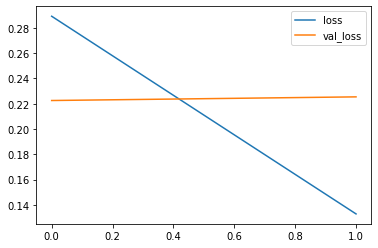

In [ ]:
%matplotlib inline 

hist_info = pd.DataFrame(hist.history)
hist_info[['loss','val_loss']].plot()

<AxesSubplot:>

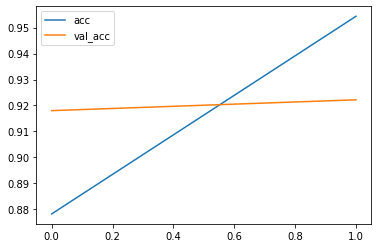

In [ ]:
hist_info[['acc','val_acc']].plot()

# Save tokenizer

In [ ]:
import pickle
pickle.dump(tokenizer, open('./model_trained/sentiment_tokenizer.pickle', 'wb'))

# Save model

In [ ]:
model.save('./model_trained/sentiment_best_model.hdf5')

# Use model

In [ ]:
import jieba
import re
# 輸入文字有些會含有特殊符號會出現在文字中，去除之，否則會報錯
# 中文編碼介於\u4e00-\u9fa5之間(unicode)
chinese_word_regex = re.compile(r'[\u4e00-\u9fa5]+')

# get sentiment probability
def get_sentiment_proba( new_text ):
    
    tokens = jieba.lcut(new_text, cut_all=False)
    # remove some characters
    tokens = [x for x in tokens if chinese_word_regex.match(x)]
    tokens = [tokens]
    # print(tokens)
    
    # Index the document
    new_text_seq = tokenizer.texts_to_sequences(tokens)
    # Pad the document
    max_document_length = 350
    new_text_pad = sequence.pad_sequences(new_text_seq, maxlen= max_document_length)

    result = model.predict(new_text_pad)

    response = {'Negative': round(float(result[0, 0]), 2), 'Positive': round(float(result[0, 1]), 2)}
    # Note that result is numpy format and it should be convert to float

    return response

In [ ]:
new_text = '這東西沒有想像中好用!'
get_sentiment_proba( new_text )

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\x7861\AppData\Local\Temp\jieba.cache
Loading model cost 0.749 seconds.
Prefix dict has been built successfully.


{'Negative': 0.66, 'Positive': 0.34}